# Лабораторная работа 4
# Правильный многоугольник Рело. Векторизация вычислений в numpy

# Задание 4.1. Построение треугольника Рело


# Пальцев Вячеслав, 10.04

 Треугольник Рело представляет собой область пересечения трех кругов радуса r с
 центрами в вершинах равностороннего треугольника с длиной стороны r.
     
 Правильный n-угольник Рело представляет собой область пересечения n кругов
 радуса r с центрами в вершинах правильного n-угольника с нечетным числом
 сторон длины l. Радиус круга r согласован с длиной стороны l правильного
 многоугольника таким образом, чтобы окружность радиуса r с центром в вершине
 правильного n-угольника проходила через две соседние вершины правильного n-угольника, противолежащие центру.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [24]:
n = 3
center = np.array([0,0]) 
r = 10.
N = 100 

In [25]:
l=r

In [26]:
R = l/(2*np.sin(np.pi/n))

In [27]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [28]:
vertices[0,0], vertices[0,:], vertices[:,1]

(np.float64(5.773502691896258),
 array([5.77350269, 0.        ]),
 array([ 0.,  5., -5.]))

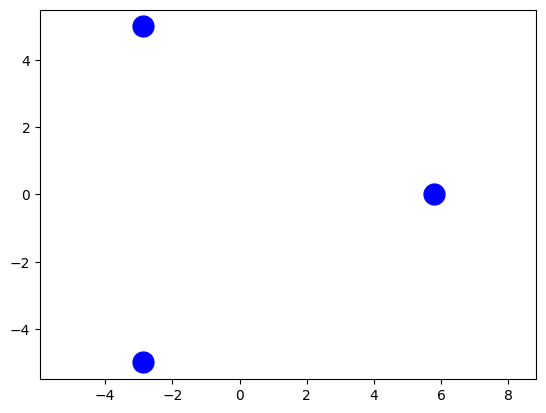

In [29]:
plt.plot(vertices[:,0],vertices[:,1],'b.',markersize=30)
plt.axis('equal');

## Этап 2. Представление одной стороны треугольника Рело

In [30]:
alpha = 2*np.pi/n
beta = alpha/2

In [31]:
angle = np.linspace(-beta/2, beta/2, N)

In [32]:
side0 = vertices[0] + r*np.transpose([np.cos(angle + np.pi), np.sin(angle + np.pi)])

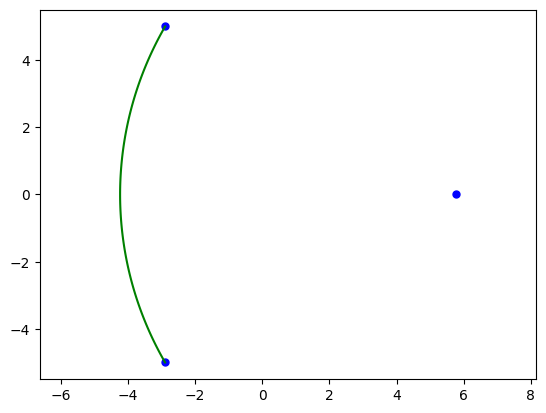

In [33]:
plt.plot(vertices[:,0],vertices[:,1],'b.',markersize=10)
plt.plot(side0[:,0],side0[:,1],'g-',markersize=10)
plt.axis('equal');

In [34]:
side1 = vertices[1] + r*np.transpose([np.cos(angle + np.pi + alpha),np.sin(angle + np.pi + alpha)])


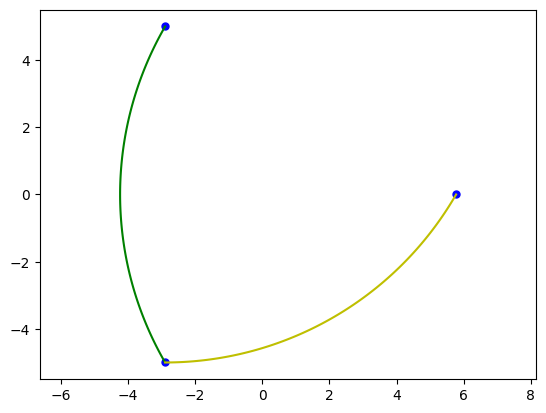

In [35]:
plt.plot(vertices[:,0],vertices[:,1],'b.',markersize=10)
plt.plot(side0[:,0],side0[:,1],'g-',markersize=10)
plt.plot(side1[:,0],side1[:,1],'y-',markersize=10)
plt.axis('equal');

## Этап 3. Моделирование границы треугольника Рело

In [36]:
list_sides = [vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)]

In [37]:
sides = np.concatenate(list_sides)

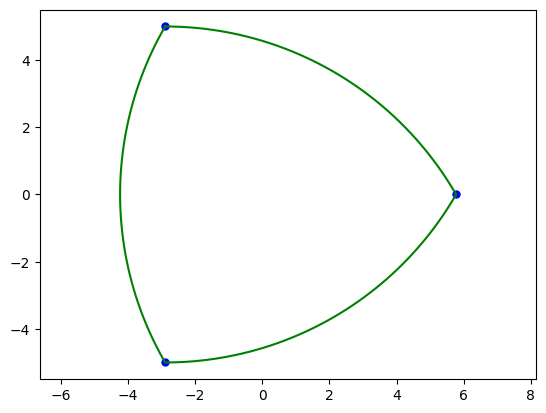

In [38]:
plt.plot(vertices[:,0],vertices[:,1],'b.',markersize=10)
plt.plot(sides[:,0],sides[:,1],'g-',markersize=10)
plt.axis('equal');

# Задание 4.2. Построение правильного многоугольника Рело

In [39]:
t = np.arange(0,2*np.pi,2*np.pi/n)
vertices = center + R*np.transpose([np.cos(t), np.sin(t)])

In [40]:
alpha = 2*np.pi/n
beta = alpha/2

In [41]:
sides = np.concatenate([vertices[i] +
 r*np.transpose([np.cos(angle + np.pi + i*alpha),
 np.sin(angle + np.pi + i*alpha)])
 for i in range(n)])

In [42]:
l=math.sqrt(2*r*r*(1-math.cos(beta)))

In [43]:
R = l/(2*np.sin(np.pi/n))

# Задание 4.3. Результирующая пользовательская функция

In [44]:
def regular_polygon_Relo(n=3, center=np.array([0, 0]), r=1, N=100):
    
    assert isinstance(n, int) and n > 2 and n % 2 == 1
    assert isinstance(center, np.ndarray) and center.shape == (2,)
    assert isinstance(r, (int, float)) and r > 0
    assert isinstance(N, int) and N > 0

    
    alpha = 2*np.pi/n
    beta = alpha/2
    angle = np.linspace(-beta/2, beta/2, N)
    l=math.sqrt(2*r*r*(1-math.cos(beta)))
    
    R = l/(2*np.sin(np.pi/n))
    t = np.arange(0,2*np.pi,2*np.pi/n)
    vertices = center + R*np.transpose([np.cos(t), np.sin(t)])
    sides = np.concatenate([vertices[i] +
     r*np.transpose([np.cos(angle + np.pi + i*alpha),
     np.sin(angle + np.pi + i*alpha)])
     for i in range(n)])
    return sides

# Задание 4.4. Тестирование функции

In [55]:
from relo import regular_polygon_Relo
import numpy as np

ModuleNotFoundError: No module named 'relo'

In [56]:
relo.regular_polygon_Relo(n=2)

NameError: name 'relo' is not defined

In [57]:
relo.regular_polygon_Relo(center=[0, 0])

NameError: name 'relo' is not defined

In [58]:
relo.regular_polygon_Relo(n=6)

NameError: name 'relo' is not defined

In [59]:
relo.regular_polygon_Relo(r=-1)

NameError: name 'relo' is not defined

In [60]:
relo.regular_polygon_Relo(N=4.5)

NameError: name 'relo' is not defined

NameError: name 'relo' is not defined

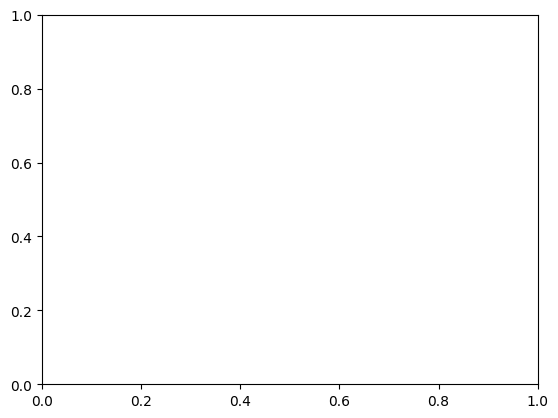

In [61]:
plt.figure()
ax=plt.axes()
sides1 = relo.regular_polygon_Relo(7, np.array([0, 0]), 1, 100)
ax.plot(sides1[:, 0], sides1[:, 1],'r-',markersize=10)
sides2 = relo.regular_polygon_Relo()
ax.plot(sides2[:, 0], sides2[:, 1],'g-',markersize=10)
sides3 = relo.regular_polygon_Relo(n=5, center=np.array([0, 1]), r=2, N=70)
ax.plot(sides3[:, 0], sides3[:, 1],'pink',markersize=10)
sides4 = relo.regular_polygon_Relo(9, np.array([1, 0]), N=150, r=2)
ax.plot(sides4[:, 0], sides4[:, 1],'purple',markersize=10)
plt.axis('equal');